# runs
1. one-hot encoding, freq encoding, target encoding
2. order hour different intervals - hour_interval 4 category or 48 category


further:

promotion_name
product_name
attribute_value
Add q&a
add reviews

siparişte benzer ürün var mı?
    farklı beden ürün var mı?


encodings:
    
    Frequency Encoding

    Replace the values with its frequency
    But be careful, some values may have same frequency
    data[‘country’].value_counts()

    Target Encoding (Mean encoding)

    Each of the categories is the variable is replaced with the mean target value for that category
    for each catergory in a column: sum of target / count of target 

holiday dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msgn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import *

In [2]:
import pickle
with open("all_df.pickle","rb") as f:
    df = pickle.load(f)

In [3]:
df

,is_elite_user,promotion_award_value,coupon_discount,is_wallet_trx,is_saved_card_trx,ship_cost,brand_id,category_id,gender_id,color_id,...,diff_order_memdate,order_weekday,order_day,order_week,age,is_bday_close,attribute_value,original_price,discounted_price,is_returned
0,0,35.0,0.0,0,True,8.880,682,604,4294.0,6998.0,...,3676,5,1,17,42,0,XL,79.90,51.94,0.0
1,0,40.0,0.0,0,True,9.400,121,604,4294.0,7012.0,...,3676,5,1,17,42,0,XL,129.95,59.97,0.0
2,0,0.0,0.0,0,True,10.670,381,2949,4294.0,6999.0,...,3676,5,1,17,42,0,XL,59.99,49.99,0.0
3,0,0.0,0.0,0,True,10.670,381,2949,4294.0,7006.0,...,3676,5,1,17,42,0,XL,49.90,49.90,0.0
4,1,20.0,0.0,0,False,9.400,40,1182,4295.0,7004.0,...,1107,5,1,17,101,0,40,89.99,71.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10772656,0,10.0,0.0,1,False,11.330,966293,563,4294.0,6999.0,...,236,5,31,30,111,0,L,199.99,71.99,0.0
10772657,0,60.0,0.0,1,False,2.098,121,597,4294.0,7012.0,...,236,5,31,30,111,0,M,239.95,85.58,0.0
10772658,0,60.0,0.0,1,False,2.098,121,597,4294.0,7004.0,...,236,5,31,30,111,0,XL,219.95,75.98,0.0
10772659,0,55.0,0.0,1,False,10.490,121,597,4294.0,6998.0,...,236,5,31,30,111,0,M,199.95,69.73,0.0


In [4]:
df['is_elite_user'] = df['is_elite_user'].astype(np.int32)
df['promotion_award_value'] = df['promotion_award_value'].astype(np.float32)
df['coupon_discount'] = df['coupon_discount'].astype(np.float32)
df['is_wallet_trx'] = df['is_wallet_trx'].astype('category')
df['ship_cost'] = df['ship_cost'].astype(np.float32)
df['brand_id'] = df['brand_id'].astype(np.int32)
df['category_id'] = df['category_id'].astype(np.int32)
df['gender_id'] = df['gender_id'].astype(np.float32)
df['color_id'] = df['color_id'].astype(np.float32)
df['gender'] = df['gender'].astype('category')
df['returnRate'] = df['returnRate'].astype(np.float32)
df['returnRate_def'] = df['returnRate_def'].astype(np.float32)
df['total_claim'] = df['total_claim'].astype(np.float32)
df['unresolvedclaim_percentage'] = df['unresolvedclaim_percentage'].astype(np.float32)
df['unresolved_percentage'] = df['unresolved_percentage'].astype(np.float32)
df['paid_amount'] = df['paid_amount'].astype(np.float32)
df['discount_ratio'] = df['discount_ratio'].astype(np.float32)
df['hour_interval'] = df['hour_interval'].astype('category')
df['diff_order_memdate'] = df['diff_order_memdate'].astype(np.int32)
df['order_weekday'] = df['order_weekday'].astype('category')
df['order_day'] = df['order_day'].astype('category')
df['order_week'] = df['order_week'].astype('category')
df['age'] = df['age'].astype(np.int32)
df['is_bday_close'] = df['is_bday_close'].astype('category')
df['attribute_value'] = df['attribute_value'].astype('category')
df['original_price'] = df['original_price'].astype(np.float32)
df['discounted_price'] = df['discounted_price'].astype(np.float32)
df['is_returned'] = df['is_returned'].astype('category')

In [5]:
label = ['is_returned']

categorical_str = [
'is_saved_card_trx',
'attribute_value',
] 

categorical_int = [
'gender_id',
'category_id',
'color_id',
'order_weekday',
'order_week',
'brand_id',
'order_day',
'hour_interval',
]

numerical = [
'original_price',
'discounted_price',
'ship_cost',
'coupon_discount',
'age',
'diff_order_memdate',
'total_claim',
'promotion_award_value',
'discount_ratio',
'paid_amount'
]

numerical2 = [
'returnRate',
'returnRate_def',
'unresolvedclaim_percentage',
'unresolved_percentage'
]
passthrough = [
'is_elite_user',
'is_wallet_trx',
'is_bday_close']

ids_ = [
'product_id',
'supplier_id',
'user_id',
'order_line_item_id',
'order_parent_id',
'product_variant_id',
'product_content_id_tra',
'product_content_id_prod'
]

drops = [
'color_name',
'supplier_color_name',
'attributet_name',
'gender_name',
'category_name',
'brand_name',
'product_name',
'coupon_id',
'promotion_name',
'order_date',
'birth_date',
'membership_date']

In [6]:
merged_df = df[categorical_str+categorical_int+numerical+numerical2+passthrough+label]

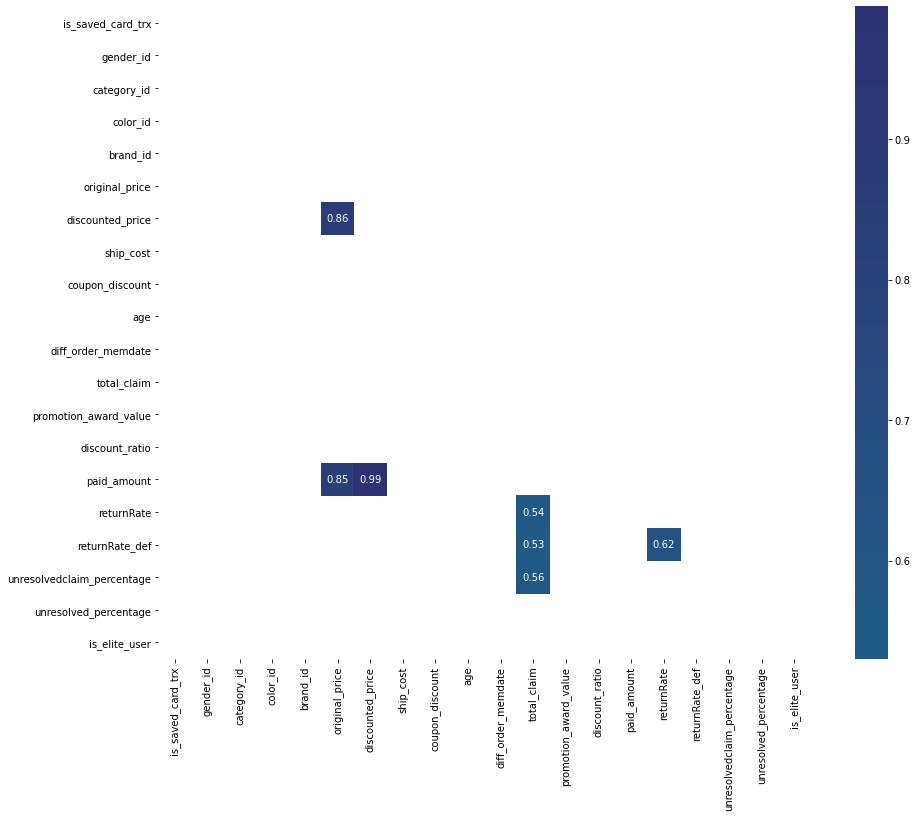

In [7]:
matrix = merged_df.corr().abs()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
plt.figure(figsize=(16, 12))
sns.heatmap(matrix[matrix>0.5], mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap='crest')

plt.show();

In [8]:
def print_metrics(y_pred, y_test, model):
    print("Model results: ", type(model).__name__)
    print(classification_report(y_test, y_pred))
    print("Confusion matrix:")
    cm = confusion_matrix(y_test,y_pred, labels= model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= model.classes_)
    disp.plot()

In [9]:
def create_pipeline_rf():
    
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])

    numeric_transformer2 = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean'))])
    
    categorical_str_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])
    
    categorical_int_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=-99)),
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])
    

    preprocessor = ColumnTransformer(
                                    transformers=[
                                                  ('num1', numeric_transformer, numerical),
                                                  ('num2', numeric_transformer2, numerical2),
                                                  ('cat_str1', categorical_str_transformer, categorical_str),
                                                  ('cat_int1', categorical_int_transformer, categorical_int),
                                                  ], 
                                    remainder='passthrough')

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('f_selector', SelectKBest(f_classif, k='all')),
                          ('classifier', RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0))])
    
    return pipeline

In [13]:
pos_df = merged_df[merged_df['is_returned']==1].sample(200000)
neg_df = merged_df[merged_df['is_returned']==0].sample(200000)

model_df = pd.concat([pos_df, neg_df], axis=0)
model_df.sample(frac=1)

,is_saved_card_trx,attribute_value,gender_id,category_id,color_id,order_weekday,order_week,brand_id,order_day,hour_interval,...,discount_ratio,paid_amount,returnRate,returnRate_def,unresolvedclaim_percentage,unresolved_percentage,is_elite_user,is_wallet_trx,is_bday_close,is_returned
8338257,False,36,4295.0,1186,7004.0,6,26,3268,4,0,...,0.111123,82.949997,0.057645,0.000978,0.264478,0.005093,1,1,0,0.0
5653230,True,M,4295.0,1016,6998.0,4,23,8605,11,0,...,0.299749,16.930000,0.049671,0.000760,0.046512,0.000253,0,0,0,1.0
7328348,False,36,4295.0,1182,7006.0,5,25,40,26,3,...,0.300030,79.389999,0.127110,0.002828,0.000000,0.000000,1,0,0,1.0
7988627,False,M,4295.0,526,7004.0,3,26,40,1,1,...,0.150025,55.689999,0.127110,0.002828,0.000000,0.000000,1,0,0,0.0
1778901,True,S,4295.0,529,7009.0,1,19,1220,11,0,...,0.222346,75.614998,0.132655,0.000798,0.842105,0.025469,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693433,False,XS,4295.0,604,7014.0,3,21,40,27,4,...,0.300075,30.340000,0.127110,0.002828,0.000000,0.000000,1,1,0,1.0
1347030,True,32,4295.0,529,7009.0,5,18,40,8,2,...,0.150025,60.389999,0.127110,0.002828,0.000000,0.000000,0,0,0,0.0
137622,False,M,4295.0,1182,6998.0,5,17,40,1,3,...,0.300033,66.123337,0.127110,0.002828,0.000000,0.000000,1,1,0,1.0
9665607,False,9 Yaş,4294.0,604,7008.0,5,28,13907,17,0,...,0.347902,31.766001,0.131199,0.001297,0.084746,0.000668,0,0,0,0.0


In [14]:
y = model_df['is_returned']
X = model_df[categorical_str+categorical_int+numerical+numerical2+passthrough]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=1)

pipe1 = create_pipeline_rf()

pipe1.fit(X_train, y_train)
preds = pipe1.predict(X_test)

Model results:  Pipeline
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82     40000
         1.0       0.82      0.82      0.82     40000

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000

Confusion matrix:


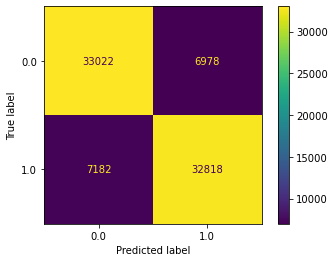

In [15]:
print_metrics(preds, y_test, pipe1)